# 🌧️ Rainfall Prediction using Machine Learning
This project uses a Random Forest Classifier to predict whether it will rain based on historical weather data. It's a simple and effective machine learning solution aimed at helping in agricultural and planning sectors.

In [7]:
from google.colab import files
uploaded = files.upload()

Saving weatherAUS[1].csv to weatherAUS[1].csv


In [8]:
import os
print(os.listdir())


['.config', 'weatherAUS[1].csv', 'sample_data']


In [10]:
import pandas as pd

df = pd.read_csv("weatherAUS[1].csv")
print("✅ Loaded weatherAUS[1].csv")

df.head()

✅ Loaded weatherAUS[1].csv


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [11]:
# ✅ Step 1: Preprocessing
# Only necessary features and drop missing values
# Make a safe copy
df = df[['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm', 'Rainfall', 'RainTomorrow']].copy()

# Drop rows with missing values
df.dropna(inplace=True)

# Convert target to binary
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [15]:
# Train using Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Predict and check accuracy
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Improved Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

✅ Improved Accuracy: 0.55

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.78      0.61         9
           1       0.67      0.36      0.47        11

    accuracy                           0.55        20
   macro avg       0.58      0.57      0.54        20
weighted avg       0.59      0.55      0.53        20



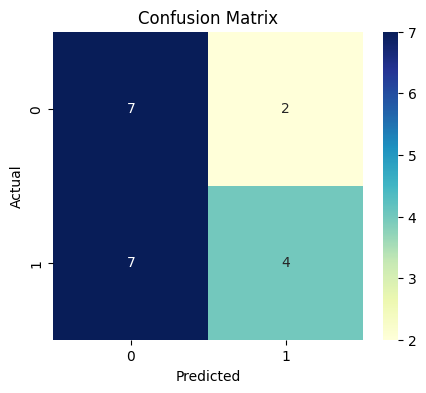

In [18]:
# Confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()